In [1]:
#================================================================
#Reading the TRACK algorithm output 
#================================================================

In [2]:
#Importing packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import netCDF4
import numpy as np
import calendar
import pandas as pd
import xarray as xr
import shapely.geometry as sgeom
import os.path
import collections
import datetime
import netCDF4
import cftime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,  LATITUDE_FORMATTER
from datetime import timedelta
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns
import h5py
import preprocessing as pre
import cartopy.feature as cfeature
from matplotlib.animation import PillowWriter

In [3]:
#Reading the storm info from my files
#file_path = '/Volumes/maxone/Masters_Thesis/Data_For_Analysis/control-1950/EC-Earth_Consortium/EC-Earth3p-HR/r1i1p2f1/TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc'
file_path = "D:\Masters_Thesis\Data_For_Analysis\control-1950\EC-Earth_Consortium\EC-Earth3p-HR\\r1i1p2f1\TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc"

hemi = 'SH'  # or 'NH'

basin = 'si'
#control-1950
storms, feature_variable, months = pre.read_storms_filtered(file_path, hemi,basin)

fh type <class 'str'>
fname  D:\Masters_Thesis\Data_For_Analysis\control-1950\EC-Earth_Consortium\EC-Earth3p-HR\r1i1p2f1\TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc


In [4]:
raw_data = file_path
raw_data = xr.open_dataset(raw_data)
raw_data

<xarray.Dataset>
Dimensions:              (tracks: 4988, record: 299705, plev: 6)
Coordinates:
  * plev                 (plev) int32 925 850 700 600 500 250
Dimensions without coordinates: tracks, record
Data variables: (12/36)
    FIRST_PT             (tracks) int32 ...
    NUM_PTS              (tracks) int32 ...
    TRACK_ID             (tracks) int32 ...
    index                (record) int32 ...
    lat                  (record) float32 ...
    lat_psl              (record) float32 ...
    ...                   ...
    rv850_T63            (record) float32 ...
    sfcWind              (record) float32 ...
    time                 (record) datetime64[ns] ...
    vortmean_T63         (record) float32 ...
    warm_core_indicator  (record) int32 ...
    ws925                (record) float32 ...
Attributes: (12/56)
    activity_id:               HighResMIP
    branch_method:             none provided
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     0.0
    cmor_version:              3.3.2
    ...                        ...
    nco_openmp_thread_number:  1
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
    CMIP6_MODEL:               CMIP6.HighResMIP.EC-Earth-Consortium.EC-Earth3...
    CMIP6_REFERENCE:           EC-Earth Consortium (EC-Earth) (2018). EC-Eart...
    CMIP6_DOI:                 https://doi.org/10.22033/ESGF/CMIP6.
    version:                   v20181119

In [5]:
experiment = 'control-1950'
YEARSTART = '2020'
YEAREND = '2020'
algorithm = 'TRACK'
YEARSTART = int(YEARSTART)
YEAREND = int(YEAREND)
yearsplot = list(range(YEARSTART, YEAREND+1))
    
institute = 'EC-Earth'
model = 'EC-Earth3P'
resol = 'HR'
model_grid = 'gr'
member_id = 'r1i1p2f1'

In [6]:
def storm_tracks(storms, years, months, basin, title, fig, ax, algorithm, hemi, genesis=False, lysis=False, max_intensity=False, warmcore = False, yoff=0.):
   
    count = 0
    for year in years:
        for storm in pre._storms_in_time_range(storms, year, months):
            if genesis:
                variable = 'Genesis'
                ax.plot(storm.obs_at_genesis().lon, storm.obs_at_genesis().lat,
                         'bo', markersize=3, transform=ccrs.Geodetic())

            elif lysis:
                variable = 'Lysis'
                ax.plot(storm.obs_at_lysis().lon, storm.obs_at_lysis().lat,
                         'go', markersize=3, transform=ccrs.Geodetic())

            elif max_intensity:
                variable = 'Maximum Intensity'
                ax.plot(storm.obs_at_vmax().lon, storm.obs_at_vmax().lat,
                         'ro', markersize=3, transform=ccrs.Geodetic())

            else:
                variable = 'Tracks'   
                ax.plot([ob.lon for ob in storm.obs], [ob.lat for ob in storm.obs],
                     linewidth=1.2, transform=ccrs.Geodetic())
            
            '''# Add storm number label
                snbr = storm.snbr
                last_obs = storm.obs[-1]
                ax.text(last_obs.lon, last_obs.lat, snbr, ha='left', va='center',
                        fontsize=8, transform=ccrs.Geodetic())'''
            
            count += 1

    if count != 0:
        fig.gca().coastlines() 
        title1 = 'Model Tropical Storm %s\n %s (%s - %s) using %s \n %s' % \
                  (variable, pre.BASIN_NAME.get(basin), str(years[0]), str(years[-1]), algorithm, title)
        print(title1)
        ax.set_title(title1, fontsize=12)
        #s = ('Total tropical storms for %s: %s' % (hemi, count))
        #fig.text(0.02, 0.09-yoff, s, ha='left', va='center', transform=plt.gca().transAxes)
           
    else:
        print('No storms found')

Model Tropical Storm Tracks
 Southwest Indian Ocean (2020 - 2020) using TRACK 
  


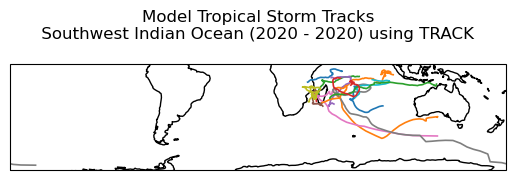

In [7]:


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

storm_tracks(storms,yearsplot,months,'si',' ',fig,ax,algorithm,hemi)

TRACK
fh type <class 'str'>
fname  D:\Masters_Thesis\Data_For_Analysis\control-1950\EC-Earth_Consortium\EC-Earth3p-HR\r1i1p2f1\TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc


c:\Users\Nick\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Model Tropical Storm Tracks
 Southwest Indian Ocean (2020 - 2020) using TRACK 
 EC-Earth3P-HR, r1i1p2f1, 2020-2020
fh type <class 'str'>
fname  D:\Masters_Thesis\Data_For_Analysis\control-1950\EC-Earth_Consortium\EC-Earth3p-HR\r1i1p2f1\TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc
Model Tropical Storm Tracks
 Southwest Indian Ocean (2020 - 2020) using TRACK 
 EC-Earth3P-HR, r1i1p2f1, 2020-2020


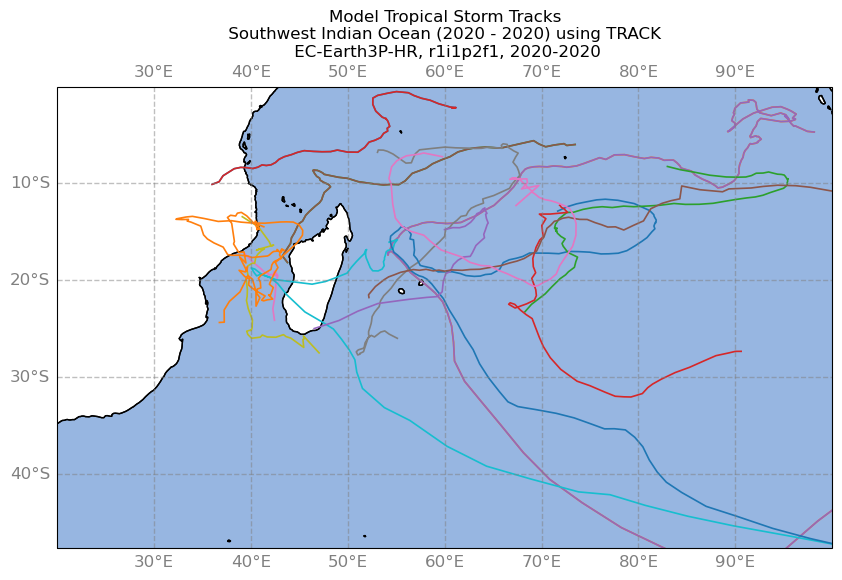

In [8]:
#Plotting my storm info 
runid_info = {'model': model, 'resol': resol, 'grid': model_grid, 'algorithm': algorithm, 'member_id':member_id}
runid_info2 = {'model': model, 'resol': resol, 'grid': model_grid, 'algorithm': algorithm, 'member_id':member_id}
dir_test = file_path
print(algorithm)


pre.work(runid_info,dir_test,YEARSTART,YEAREND,yearsplot,basin, algorithm, member_id)

In [9]:
#================================================================
#Animations
#================================================================

In [10]:
#Viewing the storm objects (entire SH) as a list
for storm in storms:
    print(storm)

Storm 0 with 43 observations that began on 1950-01-01T00:00:00, ending on 1950-01-11T00:00:00 lasting 10 days.
Storm 3 with 20 observations that began on 1950-01-10T18:00:00, ending on 1950-01-15T18:00:00 lasting 5 days.
Storm 7 with 53 observations that began on 1950-01-05T06:00:00, ending on 1950-01-18T06:00:00 lasting 13 days.
Storm 8 with 73 observations that began on 1950-01-06T18:00:00, ending on 1950-01-24T18:00:00 lasting 18 days.
Storm 10 with 59 observations that began on 1950-02-02T12:00:00, ending on 1950-02-16T12:00:00 lasting 14 days.
Storm 13 with 59 observations that began on 1950-02-21T06:00:00, ending on 1950-03-07T06:00:00 lasting 14 days.
Storm 16 with 55 observations that began on 1950-02-26T06:00:00, ending on 1950-03-11T06:00:00 lasting 13 days.
Storm 24 with 83 observations that began on 1950-03-06T06:00:00, ending on 1950-03-26T06:00:00 lasting 20 days.
Storm 26 with 72 observations that began on 1950-04-11T06:00:00, ending on 1950-04-29T06:00:00 lasting 18 day

In [11]:
# Create an empty dictionary to hold the storm data
storm_data = {"storm_id": [], "genesis_date": [], "lysis_date": [], "lifetime": [], "vmax": [], "mslp": []}

# Loop over the filtered storms and add the relevant information to the dictionary
for storm in storms:
    storm_data["storm_id"].append(storm.snbr)
    storm_data["genesis_date"].append(storm.genesis_date)
    storm_data["lysis_date"].append(storm.lysis_date)
    storm_data["lifetime"].append(storm.lifetime)
    storm_data["vmax"].append(storm.vmax)
    storm_data["mslp"].append(storm.mslp_min)


# Create a DataFrame from the storm data dictionary
storm_df = pd.DataFrame(storm_data)

# Print the DataFrame
print(storm_df.loc[storm_df['storm_id'] == 3579])

     storm_id         genesis_date           lysis_date  lifetime       vmax  \
950      3579  2021-01-01 12:00:00  2021-01-12 12:00:00        11  21.499241   

           mslp  
950  1001.22998  


In [12]:
#Creating a dataframe out of the storm information
storms_df, feature_variable, months = pre.read_storms_df(file_path, hemi)

#showing the dataframe filtered for different criteria that I want
filtered_df = storms_df[(storms_df['year'] == 1953) & (storms_df['intensity'] > 45) ]
print(filtered_df)

print(storms_df.loc[200])

fh type <class 'str'>
fname  D:\Masters_Thesis\Data_For_Analysis\control-1950\EC-Earth_Consortium\EC-Earth3p-HR\r1i1p2f1\TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc
     year  storm_id  start_date    end_date  duration  intensity
168  1953       168  1953-03-06  1953-04-06        31  48.238571
177  1953       177  1953-03-31  1953-04-08         8  46.785660
185  1953       185  1953-05-03  1953-05-10         7  51.075642
188  1953       188  1953-05-17  1953-05-24         7  51.138641
190  1953       190  1953-06-18  1953-06-26         8  45.968071
197  1953       197  1953-09-09  1953-09-17         8  50.014210
year                1953
storm_id             200
start_date    1953-11-24
end_date      1953-12-18
duration              24
intensity      22.993099
Name: 200, dtype: object


fh type <class 'str'>
fname  D:\Masters_Thesis\Data_For_Analysis\control-1950\EC-Earth_Consortium\EC-Earth3p-HR\r1i1p2f1\TC-SH_TRACK_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19500101-20491231.nc


d:\Masters_Thesis\Data_Preprocessing\preprocessing.py:787: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  projected_track = sgeom.LineString(projected_track[0].coords)
c:\Users\Nick\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


(<Figure size 1600x1200 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'Storm Track'}, xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 1000x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Wind Speeds Along Storm Track'}, xlabel='Time (steps)', ylabel='Wind Speed (mps)'>)

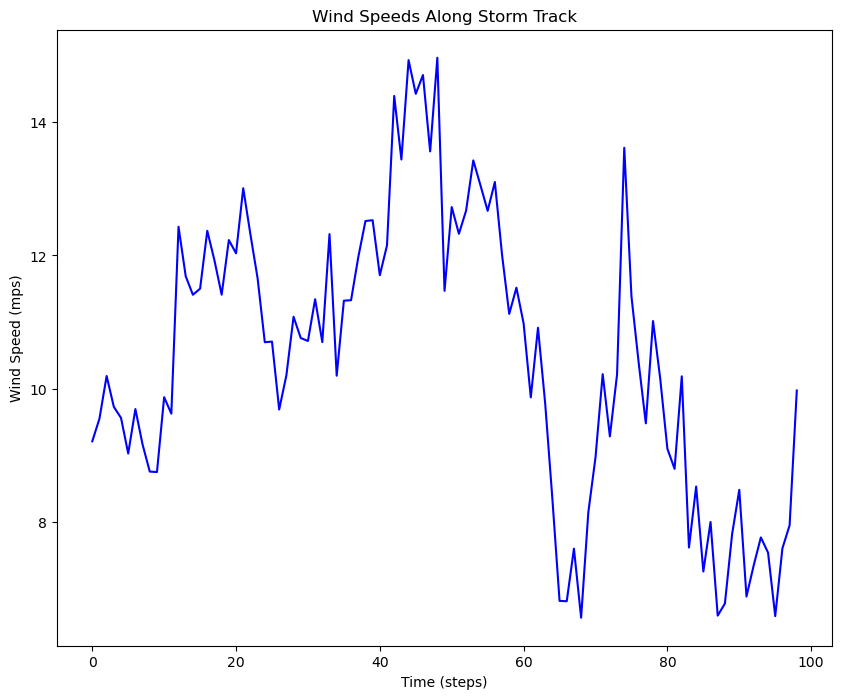

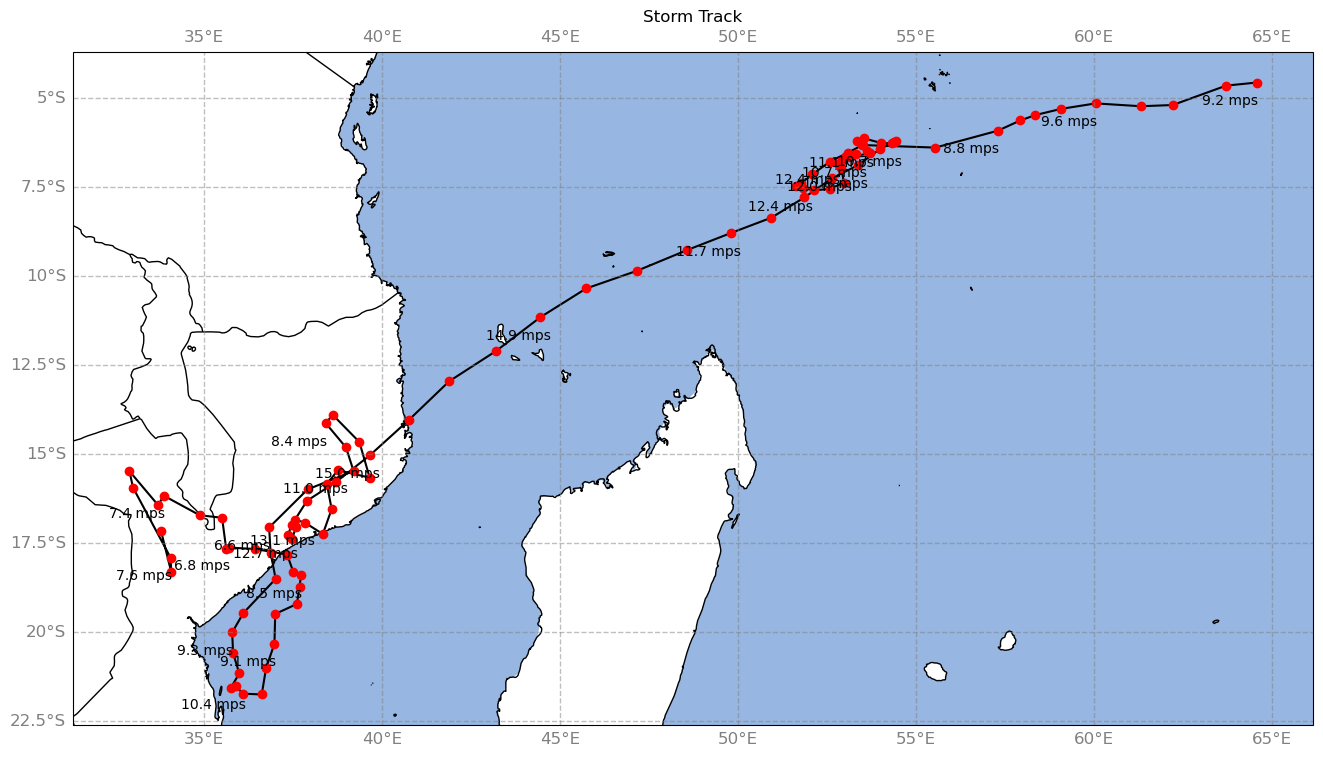

In [12]:
pre.plot_storm(file_path, hemi, storm_num=200)

In [13]:
daily_fp = "D:/Masters_Thesis/Data_Preprocessing/sfcWind_day_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19530101-19531231.nc"
daily = xr.open_dataset(daily_fp)
daily

<xarray.Dataset>
Dimensions:    (time: 365, lat: 512, lon: 1024, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1953-01-01T12:00:00 ... 1953-12-31T12:00:00
  * lat        (lat) float32 -89.73 -89.38 -89.03 -88.68 ... 89.03 89.38 89.73
  * lon        (lon) float32 0.0 0.3516 0.7031 1.055 ... 358.6 358.9 359.3 359.6
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    sfcWind    (time, lat, lon) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float32 ...
    lon_bnds   (lon, bnds) float32 ...
Attributes: (12/46)
    activity_id:            HighResMIP
    branch_method:          none provided
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.3.2
    comment:                near-surface (usually, 10 meters) wind speed.
    ...                     ...
    title:                  EC-Earth3P-HR output prepared for CMIP6
    tracking_id:            hdl:21.14100/dce42207-b7d4-4686-acbc-302b4f9a73f6
    variable_id:            sfcWind
    variant_label:          r1i1p2f1
    Conventions:            CF-1.7 CMIP-6.2
    history:                2020-01-23T11:07:59Z BranchTimeDelete, HistoryCle...

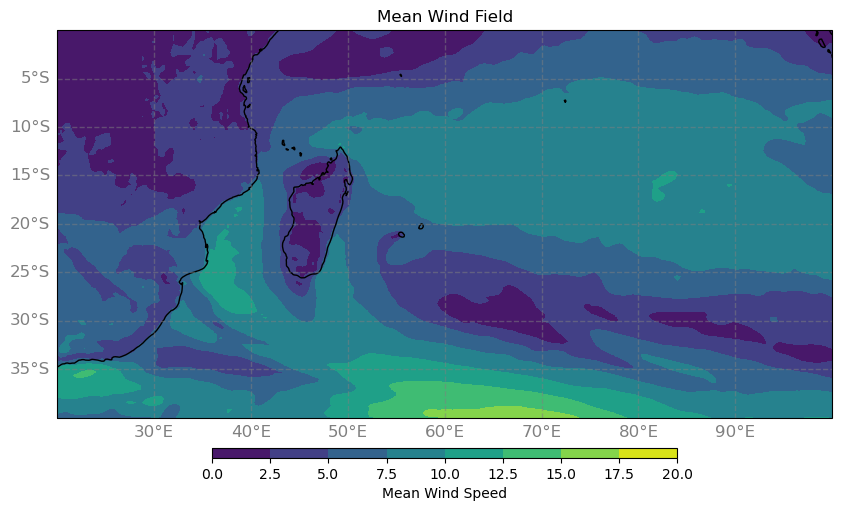

In [14]:
pre.plot_sfcWind_1day(True, daily,'1953-11-24')

In [15]:
start_date = '1953-11-24'
end_date = '1953-12-18'
date_range = pre.get_date_range(start_date, end_date)

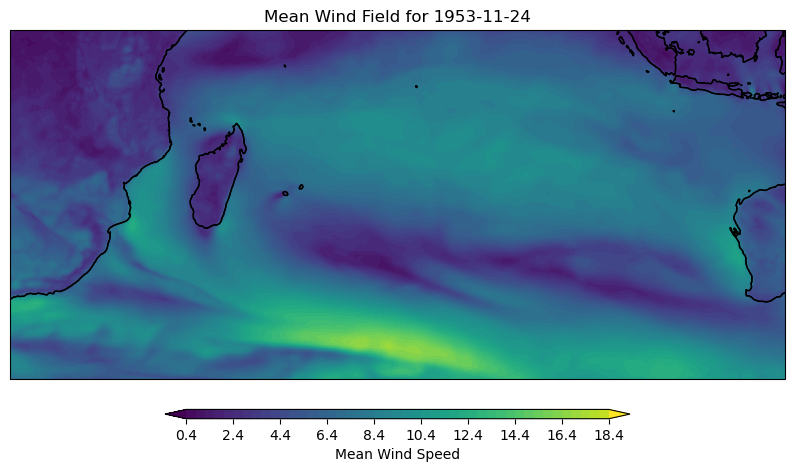

IndexError: list index out of range

In [16]:
start_date = '1953-11-24'
end_date = '1953-12-18'
date_range = pre.get_date_range(start_date, end_date)


data = daily
dates = date_range


def plot_sfcWind(ax, data, date, wind):
    #Make a more efficient time
    newTime = pd.to_datetime(data.time.values)
    data['time'] = newTime.strftime('%Y-%m-%d')
    
    #Create a subset of data
    subset = data.sel(time=date)

    lats = subset.lat.values
    lons = subset.lon.values

    #plot mean field
    extent = [-340, -240, 0, -45]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    cf = ax.contourf(lons, lats, wind, transform=ccrs.PlateCarree(), extend='both', levels=50,vmin=0, vmax=20)
    
    ax.coastlines()

    ax.set_title('Mean Wind Field for {}'.format(date)) 

    return cf
    
def update_sfcWind(frame):
    date = dates[frame]
    wind = data.sel(time=date).sfcWind.values
    cf = plot_sfcWind(ax, data, date, wind)
    plt.pause(0.1)

    # Recompute the contour levels and update the colorbar
    vmin, vmax = cf.get_clim()
    cf.set_clim(vmin, vmax)
    cf.set_clim(vmin, vmax)

# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=50)})
wind = data.sel(time=dates[0]).sfcWind.values
cf = plot_sfcWind(ax, data, dates[0], wind)

# Create the colorbar
cbar = plt.colorbar(cf, extend='both', orientation='horizontal', shrink=0.6, pad=0.05, aspect=50)
cbar.set_label('Mean Wind Speed')

# Create the animation object
anim = FuncAnimation(fig, update_sfcWind, frames=len(dates), interval=200)

# Save the animation as a gif
anim.save('SfcWind.gif', writer=PillowWriter(fps=2))

plt.show()



In [ ]:
sfcWindMax_fp = "D:/Masters_Thesis/Data_Preprocessing/sfcWindmax_day_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19530101-19531231.nc"
sfcWindMax = xr.open_dataset(sfcWindMax_fp)
sfcWindMax

<xarray.Dataset>
Dimensions:     (time: 365, lat: 512, lon: 1024, bnds: 2)
Coordinates:
  * time        (time) datetime64[ns] 1953-01-01T12:00:00 ... 1953-12-31T12:0...
  * lat         (lat) float32 -89.73 -89.38 -89.03 -88.68 ... 89.03 89.38 89.73
  * lon         (lon) float32 0.0 0.3516 0.7031 1.055 ... 358.9 359.3 359.6
    height      float64 ...
Dimensions without coordinates: bnds
Data variables:
    sfcWindmax  (time, lat, lon) float32 ...
    time_bnds   (time, bnds) datetime64[ns] ...
    lat_bnds    (lat, bnds) float32 ...
    lon_bnds    (lon, bnds) float32 ...
Attributes: (12/46)
    activity_id:            HighResMIP
    branch_method:          none provided
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.3.2
    comment:                Daily maximum near-surface (usually, 10 meters) w...
    ...                     ...
    title:                  EC-Earth3P-HR output prepared for CMIP6
    tracking_id:            hdl:21.14100/27d2afda-b035-4b0c-9100-4cb859a75ad1
    variable_id:            sfcWindmax
    variant_label:          r1i1p2f1
    Conventions:            CF-1.7 CMIP-6.2
    history:                2020-01-23T11:42:47Z BranchTimeDelete, HistoryCle...

In [ ]:
sfcWindMax_fp = "D:/Masters_Thesis/Data_Preprocessing/sfcWindmax_day_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_19530101-19531231.nc"
sfcWindMax = xr.open_dataset(sfcWindMax_fp)
sfcWindMax

start_date = '1953-11-24'
end_date = '1953-12-18'
date_range = pre.get_date_range(start_date, end_date)

data = sfcWindMax
dates = date_range

def plot_sfcWindmax(ax, data, date, wind):
    #Make a more efficient time
    newTime = pd.to_datetime(data.time.values)
    data['time'] = newTime.strftime('%Y-%m-%d')
    
    #Create a subset of data
    subset = data.sel(time=date)

    lats = subset.lat.values
    lons = subset.lon.values

    #plot mean field
    extent = [-340, -240, 0, -45]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    cf = ax.contourf(lons, lats, wind, transform=ccrs.PlateCarree(), extend='both', levels=50,vmin=0, vmax=20)
    
    ax.coastlines()

    ax.set_title('Mean Wind Field for {}'.format(date)) 

    return cf

def update_sfcWindmax(frame):
    date = dates[frame]
    wind = data.sel(time=date).sfcWindmax.values
    cf = plot_sfcWindmax(ax, data, date, wind)
    plt.pause(0.1)

    # Recompute the contour levels and update the colorbar
    vmin, vmax = cf.get_clim()
    cf.set_clim(vmin, vmax)
    cf.set_clim(vmin, vmax)



# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=50)})
wind = data.sel(time=dates[0]).sfcWindmax.values[0]
cf = plot_sfcWindmax(ax, data, dates[0], wind)

# Create the colorbar
cbar = plt.colorbar(cf, extend='both', orientation='horizontal', shrink=0.6, pad=0.05, aspect=50)
cbar.set_label('Mean Wind Speed')

# Create the animation object
anim = FuncAnimation(fig, update_sfcWindmax, frames=len(dates), interval=200)


# Save the animation as a gif
anim.save('D:/Masters_Thesis/Data_Preprocessing/sfcWindmax.gif', writer=PillowWriter(fps=2))

plt.show()

In [ ]:

vortmean_fp = "D:/Masters_Thesis/Data_Preprocessing/vortmean_6hrPlevPt_EC-Earth3P-HR_control-1950_r1i1p2f1_gr_195301010000-195312311800.nc"
vortmean_data = xr.open_dataset(vortmean_fp)
vortmean_data

<xarray.Dataset>
Dimensions:    (time: 1460, lat: 512, lon: 1024, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1953-01-01 ... 1953-12-31T18:00:00
  * lat        (lat) float32 -89.73 -89.38 -89.03 -88.68 ... 89.03 89.38 89.73
  * lon        (lon) float32 0.0 0.3516 0.7031 1.055 ... 358.6 358.9 359.3 359.6
    plev       float64 ...
Dimensions without coordinates: bnds
Data variables:
    vortmean   (time, lat, lon) float32 ...
    lat_bnds   (lat, bnds) float32 ...
    lon_bnds   (lon, bnds) float32 ...
    plev_bnds  (bnds) float64 ...
Attributes: (12/46)
    activity_id:            HighResMIP
    branch_method:          none provided
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.3.2
    comment:                Mean vorticity over 850,700,600 hPa
    ...                     ...
    title:                  EC-Earth3P-HR output prepared for CMIP6
    tracking_id:            hdl:21.14100/ea9c9dfa-3dd7-4621-9533-f26cd789e23b
    variable_id:            vortmean
    variant_label:          r1i1p2f1
    Conventions:            CF-1.7 CMIP-6.2
    history:                2020-04-01T09:06:07Z BranchTimeDelete, HistoryCle...

In [ ]:
start_date = '1953-11-24'
end_date = '1953-12-18'
date_range = pre.get_date_range(start_date, end_date)


with xr.open_dataset(vortmean_fp) as vortmean_data:
    data = vortmean_data


dates = date_range


def plot_vortmean(ax, data, date):
    # Create a subset of data
    subset = data.sel(time=date)

    lats = subset.lat.values
    lons = subset.lon.values

    # Plot mean field
    extent = [-340, -240, 0, -45]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    subset_values = subset.vortmean.values[0]

    levels = np.linspace(-0.00005, 0.00005, 21)
    cf = ax.contourf(lons, lats, subset_values, transform=ccrs.PlateCarree(), extend='both', levels=levels, vmin=-0.00005, vmax=0.00005)

    ax.coastlines()

    ax.set_title('Mean Vorticity Field for {}'.format(date))

    return cf


def update_vortmean(frame, dummy):
    date = dates[frame]
    cf = plot_vortmean(ax, data, date)
    plt.pause(0.1)

In [ ]:
# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=50)})
cf = plot_vortmean(ax, data, dates[0])

# Create the colorbar
cbar = plt.colorbar(cf, extend='both', orientation='horizontal', shrink=0.6, pad=0.05, aspect=50)
cbar.set_label('Mean Vorticity')